# Class 6 - Numpy - intro

In [3]:

import numpy as np

# Reproducibility
np.random.seed(42)

# Utility pretty-print
def peek(a, n=5):
    a = np.asarray(a)
    n = min(n, a.shape[0])
    print(f"shape={a.shape}, dtype={a.dtype}")
    print(a[:n])



## 1) NumPy Basics: Arrays, Shapes, and Dtypes
NumPy arrays are:
- **Contiguous** blocks of memory (fast!)
- Have a single **dtype** (efficient!)
- Support **vectorized** operations (concise + fast!)


In [4]:
# --- Array Creation Examples ---

# Create a 1D NumPy array explicitly from a Python list.
# The dtype is forced to 64-bit integer for precision and consistency.
a = np.array([1, 2, 3], dtype=np.int64)
a

array([1, 2, 3])

In [6]:
np.arange(0, 12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [5]:
# Create a 1D array of numbers 0–11, then reshape it into a 3x4 2D array (matrix).
# np.arange(start, stop) behaves like Python's range() but returns an array.
b = np.arange(0, 12).reshape(3, 4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
# Create 5 evenly spaced points between 0 and 1 (inclusive).
# Very useful for parameter sweeps, plotting, or simulations.
c = np.linspace(0, 1, 5)  
print(c)
len(c)

[0.   0.25 0.5  0.75 1.  ]


5

In [9]:
# Inspect the arrays with our custom helper function `peek()`
print("a:"); peek(a)   # Shows shape, dtype, and first few values
print("\nb:"); peek(b)
print("\nc:"); peek(c)

a:
shape=(3,), dtype=int64
[1 2 3]

b:
shape=(3, 4), dtype=int64
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

c:
shape=(5,), dtype=float64
[0.   0.25 0.5  0.75 1.  ]


In [10]:
# --- Indexing & Slicing Examples ---
print("\nIndexing examples")

# Access the element at first row, first column (remember: 0-based indexing)
print("b[0, 0] ->", b[0, 0])


Indexing examples
b[0, 0] -> 0


In [11]:
# Access the entire second row (index 1)
print("b[1] (row 2) ->", b[1])

b[1] (row 2) -> [4 5 6 7]


In [12]:

# Access the entire second column (index 1)
print("b[:, 1] (col 2) ->", b[:, 1])

b[:, 1] (col 2) -> [1 5 9]


In [13]:
# Fancy slicing:
#   b[::2, ::-1]
#   - '::2' means take every second row (rows 0 and 2)
#   - '::-1' means reverse the column order
# This demonstrates slicing with steps and reversal in both dimensions.
print("b[::2, ::-1] (stride + reverse) ->\n", b[::2, ::-1])

b[::2, ::-1] (stride + reverse) ->
 [[ 3  2  1  0]
 [11 10  9  8]]


In [17]:
# --- Broadcasting Example ---
# Create a column vector with shape (3,1)
# This will align automatically with the (3,4) shape of `b` due to broadcasting rules.
col = np.array([[10], [20], [30]])
print(col)
print("b")
print(b)
# Broadcasting adds `col` to each row of `b`:
# NumPy virtually "stretches" the smaller array along the missing dimension.
# Here, the (3,1) vector is broadcast to match the (3,4) matrix.
print("\nBroadcasting b + col ->\n", b + col)


[[10]
 [20]
 [30]]
b
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Broadcasting b + col ->
 [[10 11 12 13]
 [24 25 26 27]
 [38 39 40 41]]



**Try it:** Change `col` to `[[100], [200], [300]]` and re-run. What changes?



## 2) Why Vectorization Matters
Vectorized NumPy is often **orders of magnitude** faster than pure Python loops.


In [18]:

# Timing: vectorized vs loop
N = 2_000_00  # 200k elements (kept modest for quick runs)
x = np.random.randn(N)

# Pure Python loop
def py_square(xs):
    out = [0.0]*len(xs)
    for i, v in enumerate(xs):
        out[i] = v*v
    return out

# Use %timeit if running interactively; here we do a quick manual time check
import time
t0 = time.time()
y_py = py_square(x.tolist())
t1 = time.time()
y_np = x*x
t2 = time.time()

print(f"Python loop: {(t1-t0)*1000:.1f} ms")
print(f"NumPy vec : {(t2-t1)*1000:.1f} ms")
print("Check close:", np.allclose(y_py, y_np))


Python loop: 21.9 ms
NumPy vec : 0.3 ms
Check close: True


In [4]:
# --- Basic Random Number Generation with NumPy ---

# 1. Generate random samples from different distributions

# Uniform distribution on [0, 1)
# Returns 5 random floating-point numbers between 0 (inclusive) and 1 (exclusive)
a = np.random.rand(5)
print(a)

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


In [5]:
# Random integers between 1 and 6 (inclusive of 1, exclusive of 7)
# This simulates 10 rolls of a 6-sided dice
b = np.random.randint(1, 7, 10)
print(b)

[3 3 3 5 4 3 6 5 2 4]


In [6]:
# 2. Generate samples from common probability distributions

# Normal (Gaussian) distribution with mean=0, std=1
# This is the famous "bell curve" often used in statistics
normal = np.random.normal(loc=0, scale=1, size=10000)
print(normal)

[ 0.02222183 -0.42779291 -0.53181741 ...  0.81058399 -0.56890517
 -1.45700978]


In [7]:
# Binomial distribution
# n = number of trials, p = probability of success
# Example: number of heads when flipping a fair coin 10 times
binom = np.random.binomial(n=10, p=0.5, size=10000)

print(binom )

[6 7 5 ... 4 4 4]


In [8]:
# Poisson distribution
# lam = expected number of occurrences (λ)
# Often used for modeling counts of rare events (e.g., number of emails per hour)
poiss = np.random.poisson(lam=3.5, size=10000)

print(poiss)

[2 6 3 ... 2 4 3]


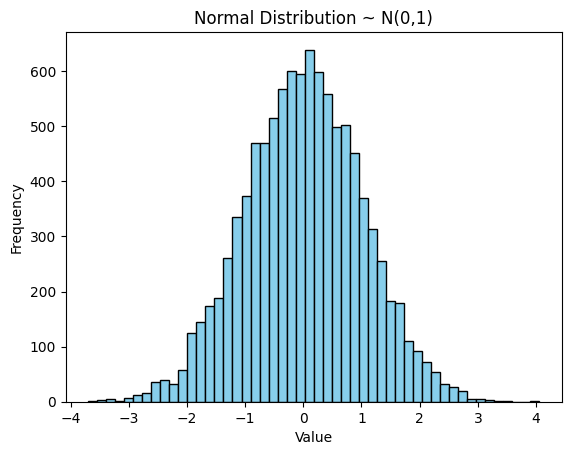

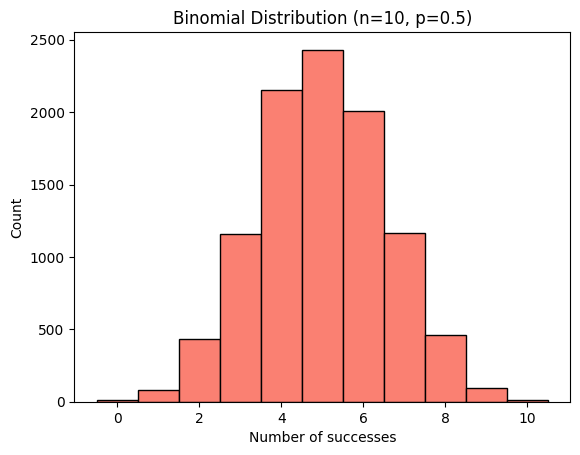

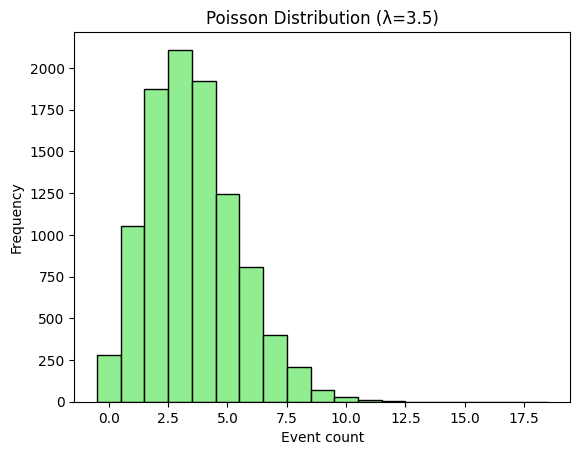

In [9]:
# 4. Plot histograms for each distribution to visualize their shapes
import matplotlib.pyplot as plt

# Normal distribution — continuous, symmetric, bell-shaped
plt.figure()
plt.hist(normal, bins=50, color='skyblue', edgecolor='black')
plt.title("Normal Distribution ~ N(0,1)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Binomial distribution — discrete, number of successes in fixed trials
plt.figure()
plt.hist(binom, bins=range(0, 12), color='salmon', edgecolor='black', align='left')
plt.title("Binomial Distribution (n=10, p=0.5)")
plt.xlabel("Number of successes")
plt.ylabel("Count")
plt.show()

# Poisson distribution — discrete, counts of independent events over time/space
plt.figure()
plt.hist(poiss, bins=range(0, 20), color='lightgreen', edgecolor='black', align='left')
plt.title("Poisson Distribution (λ=3.5)")
plt.xlabel("Event count")
plt.ylabel("Frequency")
plt.show()


# Basic Statisitcs 

Mean: 9.999242422743157
Median: 10.046808558629202
Standard Deviation: 1.9880289949593442
25/50/75 percentiles: [ 8.68770833 10.04680856 11.29367126]


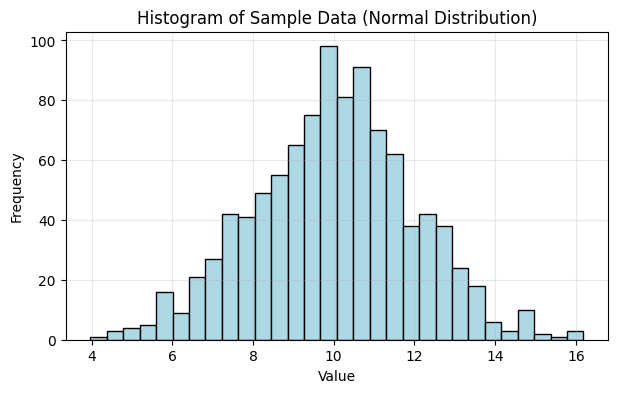

In [11]:
# --- Basic Descriptive Statistics with NumPy ---

# 1. Generate random data from a Normal (Gaussian) distribution
# mean (μ) = 10, standard deviation (σ) = 2
# This will create 1,000 random values centered around 10
x = np.random.normal(loc=10, scale=2, size=1000)

# 2. Compute common summary statistics
# These are fundamental tools for data exploration (EDA)
print("Mean:", x.mean())                          # Average value of the dataset
print("Median:", np.median(x))                    # Middle value when sorted
print("Standard Deviation:", x.std())             # Measure of spread/variability
print("25/50/75 percentiles:", np.percentile(x, [25, 50, 75]))  # Quartiles (Q1, Q2, Q3)

# 3. Visualize the distribution with a histogram
# The histogram shows how the values are spread — most should cluster around 10
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.hist(x, bins=30, color='lightblue', edgecolor='black')
plt.title("Histogram of Sample Data (Normal Distribution)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()


Proportion of heads after 1000 tosses: 0.466


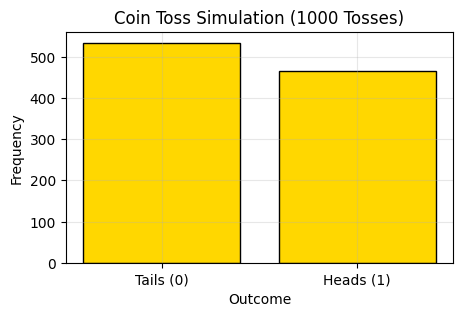

Frequencies of dice faces: {np.int64(1): np.int64(881), np.int64(2): np.int64(816), np.int64(3): np.int64(837), np.int64(4): np.int64(775), np.int64(5): np.int64(835), np.int64(6): np.int64(856)}


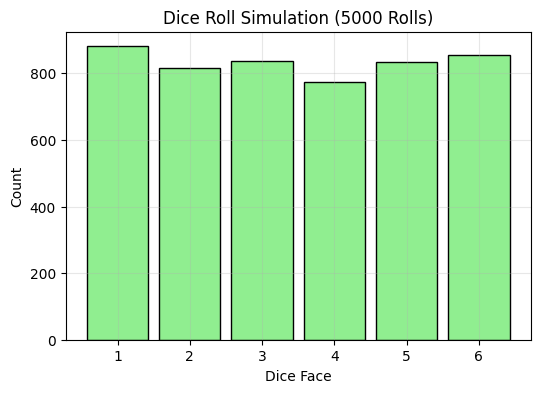

In [12]:
# --- Simulating Coin Flips and Dice Rolls with NumPy ---

import numpy as np
import matplotlib.pyplot as plt

# 1. Simulate Coin Tosses (Heads/Tails)

# Number of coin tosses
n = 1000

# Generate 1000 random outcomes: 0 = tails, 1 = heads
# np.random.choice randomly picks elements from a list
coin = np.random.choice([0, 1], size=n)  # 0 = tails, 1 = heads

# Estimate the probability of getting heads (mean of 0/1 values)
# Since tails=0 and heads=1, the mean gives the proportion of heads.
p_heads = coin.mean()

print(f"Proportion of heads after {n} tosses: {p_heads:.3f}")

# --- Plot the results as a simple histogram ---
plt.figure(figsize=(5, 3))
plt.hist(coin, bins=[-0.5, 0.5, 1.5], color='gold', edgecolor='black', rwidth=0.8)
plt.xticks([0, 1], ["Tails (0)", "Heads (1)"])
plt.title("Coin Toss Simulation (1000 Tosses)")
plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

# 2. Simulate Rolling a Six-Sided Die

# Generate 5000 random integers between 1 and 6 (inclusive)
# Each integer represents the face of a fair die
rolls = np.random.randint(1, 7, size=5000)

# Count how many times each face appears
# np.unique with return_counts=True gives unique values and their frequencies
vals, counts = np.unique(rolls, return_counts=True)

# Display frequencies as a dictionary for easy reading
print("Frequencies of dice faces:", dict(zip(vals, counts)))

# --- Plot histogram of dice rolls ---
plt.figure(figsize=(6, 4))
plt.hist(rolls, bins=np.arange(0.5, 7.5, 1), color='lightgreen', edgecolor='black', rwidth=0.85)
plt.title("Dice Roll Simulation (5000 Rolls)")
plt.xlabel("Dice Face")
plt.ylabel("Count")
plt.xticks(range(1, 7))
plt.grid(alpha=0.3)
plt.show()


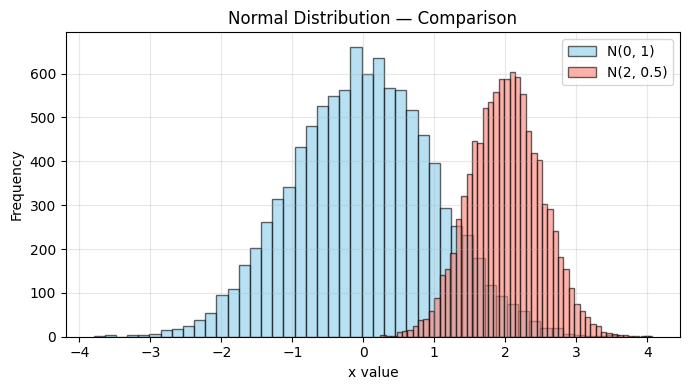

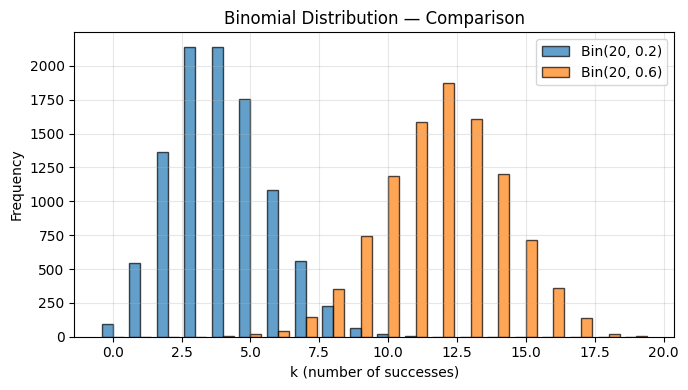

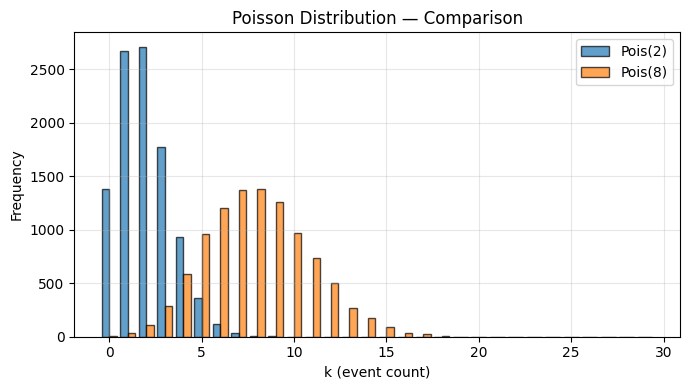

In [13]:
# DISTRIBUTIONS — Normal, Binomial, and Poisson: Comparing Histograms ---

import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility (so results look the same every run)
np.random.seed(123)
N = 10_000  # number of samples for each distribution

# ===============================
# NORMAL DISTRIBUTION COMPARISON
# ===============================

# Generate two sets of normal (Gaussian) random data
# norm_a: mean = 0, std = 1   → standard normal
# norm_b: mean = 2, std = 0.5 → shifted and narrower
norm_a = np.random.normal(loc=0.0, scale=1.0, size=N)
norm_b = np.random.normal(loc=2.0, scale=0.5, size=N)

# Plot overlapping histograms for comparison
plt.figure(figsize=(7, 4))
plt.hist(norm_a, bins=50, alpha=0.6, label="N(0, 1)", color='skyblue', edgecolor='black')
plt.hist(norm_b, bins=50, alpha=0.6, label="N(2, 0.5)", color='salmon', edgecolor='black')
plt.title("Normal Distribution — Comparison")
plt.xlabel("x value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# RESULT:
# The first (N(0,1)) is centered at 0 and wide.
# The second (N(2,0.5)) is centered at 2 and narrower (smaller spread).

# ===============================
# BINOMIAL DISTRIBUTION COMPARISON
# ===============================

# Generate two sets of binomial data
# Binomial(n, p): number of successes in n independent trials with probability p
bin_a = np.random.binomial(n=20, p=0.2, size=N)
bin_b = np.random.binomial(n=20, p=0.6, size=N)

# Plot both distributions together
plt.figure(figsize=(7, 4))
plt.hist([bin_a, bin_b],
         bins=np.arange(-0.5, 20.5, 1),
         alpha=0.7,
         label=["Bin(20, 0.2)", "Bin(20, 0.6)"],
         edgecolor='black')
plt.title("Binomial Distribution — Comparison")
plt.xlabel("k (number of successes)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# RESULT:
# Bin(20, 0.2) is skewed to the left (fewer successes).
# Bin(20, 0.6) is skewed to the right (more successes).

# ===============================
# POISSON DISTRIBUTION COMPARISON
# ===============================

# Generate two Poisson distributions
# Poisson(lam): number of events in a fixed interval, given average rate lam
poi_a = np.random.poisson(lam=2.0, size=N)
poi_b = np.random.poisson(lam=8.0, size=N)

# Plot histograms for comparison
plt.figure(figsize=(7, 4))
plt.hist([poi_a, poi_b],
         bins=np.arange(-0.5, 30.5, 1),
         alpha=0.7,
         label=["Pois(2)", "Pois(8)"],
         edgecolor='black')
plt.title("Poisson Distribution — Comparison")
plt.xlabel("k (event count)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# RESULT:
# Pois(2) peaks near k=2 and is right-skewed.
# Pois(8) peaks around k=8 and looks more symmetric (approaching a normal shape).


## Quick Explanation for Students

| **Distribution** | **Description** | **Parameters** | **Typical Use Case** |
|------------------|-----------------|----------------|----------------------|
| **Normal** | Continuous distribution with mean \( \mu \) and standard deviation \( \sigma \). | `loc` (\( \mu \)), `scale` (\( \sigma \)) | Heights, weights, measurement noise |
| **Binomial** | Discrete — number of successes in \( n \) independent trials with probability \( p \). | `n`, `p` | Coin flips, yes/no experiments |
| **Poisson** | Discrete — number of events occurring in a fixed time or space interval. | \( \lambda \) (rate) | Customer arrivals, rare events, traffic flow |


## Why Randomness in NumPy Is Essential for Data Science

The `numpy.random` module is not just about making things unpredictable —  
it’s about **simulating reality, modeling uncertainty, and testing algorithms** safely and reproducibly.

Randomness allows us to create synthetic yet realistic data, shuffle samples, test ideas, and estimate probabilities — all without needing access to a real dataset.

---

### Why We Simulate Data

In data science, **simulating data** is extremely useful because:
- Real data may be **expensive**, **sensitive**, or **hard to collect**.
- We can **prototype and test algorithms** before deploying them on real-world data.
- Controlled randomness lets us **understand model behavior** under various conditions.
- It helps teach or demonstrate statistical concepts clearly and reproducibly.

---

### Common Uses of Randomness in NumPy

| **Purpose** | **Example** | **Why It Matters** |
|--------------|-------------|--------------------|
| **Simulate data** | Generate synthetic datasets | Prototype and test algorithms before using real data |
| **Sampling** | `np.random.choice()` | Estimate statistics, perform bootstrapping, or resample datasets |
| **Model initialization** | Random weights | Avoid bias in machine learning models and improve convergence |
| **Data shuffling** | Randomize order | Ensure fair and unbiased model training |
| **Monte Carlo simulation** | Estimate π, simulate risk | Approximate probabilities or complex integrals |
| **Controlled randomness** | `np.random.seed()` | Guarantee reproducibility of experiments and results |

---

### In Summary

Randomness in NumPy gives data scientists **a controlled environment to experiment**.  
It enables:
- Building synthetic datasets,  
- Testing algorithms before deployment,  
- Modeling uncertainty realistically, and  
- Reproducing results with confidence.

In short — **without randomization, modern data science and machine learning wouldn’t exist**.



## 3) Data Cleaning with Masks and `NaN`
Common tasks:
- Recognize and handle missing values (`np.nan`).
- Clip/winsorize outliers.
- Vectorized conditional transforms.


In [20]:
# Synthetic "dirty" data
salary = np.array([50_000, 52_000, np.nan, 49_500, 500_000, 51_200, -1000, 53_500, 50_800, np.nan])
print("Raw:"); peek(salary)
print(salary)

Raw:
shape=(10,), dtype=float64
[ 50000.  52000.     nan  49500. 500000.]
[ 50000.  52000.     nan  49500. 500000.  51200.  -1000.  53500.  50800.
     nan]


In [21]:
# Missing values: impute with median of valid entries
valid = salary[~np.isnan(salary) & (salary > 0)]
median_val = np.median(valid)
salary_imputed = np.where(np.isnan(salary) | (salary <= 0), median_val, salary)

print("\nAfter imputation:"); peek(salary_imputed)


After imputation:
shape=(10,), dtype=float64
[ 50000.  52000.  51200.  49500. 500000.]


In [28]:
# --- Clip extreme outliers (e.g., top 1%) ---

# Step 1: Inspect the imputed data before clipping
# We'll print a sorted version to easily spot the high outlier(s).
print("Original (imputed) salary data (sorted):")
print(np.sort(salary_imputed))

# Step 2: Find the 99th percentile threshold
# Values above this will be capped (clipped).
hi = np.percentile(salary_imputed, 99)
print("\n99th percentile cutoff value:", hi)

# Step 3: Apply clipping
# Any value > hi is replaced with hi.
salary_clipped = np.clip(salary_imputed, None, hi)

# Step 4: Inspect results after clipping
print("\nSalaries after clipping (sorted):")
print(np.sort(salary_clipped))

# Step 5: Show side-by-side comparison (original vs clipped)
# This helps verify exactly which values changed.
print("\nElement-wise comparison (original vs clipped):")
for orig, clipped in zip(np.sort(salary_imputed), np.sort(salary_clipped)):
    flag = " <-- clipped" if orig != clipped else ""
    print(f"{orig:10.1f}  →  {clipped:10.1f}{flag}")


Original (imputed) salary data (sorted):
[ 49500.  50000.  50800.  51200.  51200.  51200.  51200.  52000.  53500.
 500000.]

99th percentile cutoff value: 459815.00000000006

Salaries after clipping (sorted):
[ 49500.  50000.  50800.  51200.  51200.  51200.  51200.  52000.  53500.
 459815.]

Element-wise comparison (original vs clipped):
   49500.0  →     49500.0
   50000.0  →     50000.0
   50800.0  →     50800.0
   51200.0  →     51200.0
   51200.0  →     51200.0
   51200.0  →     51200.0
   51200.0  →     51200.0
   52000.0  →     52000.0
   53500.0  →     53500.0
  500000.0  →    459815.0 <-- clipped


In [29]:
print("\nAfter clipping 99th percentile:"); peek(salary_clipped)

# Vectorized conditional transform example:
# Add a 5% bonus to salaries below 51k
bonus = np.where(salary_clipped < 51_000, salary_clipped * 0.05, 0)
print("\nBonus suggestion preview:"); peek(bonus)



After clipping 99th percentile:
shape=(10,), dtype=float64
[ 50000.  52000.  51200.  49500. 459815.]

Bonus suggestion preview:
shape=(10,), dtype=float64
[2500.    0.    0. 2475.    0.]



# **Task 1:** Change the percentile from 99 to 95 and see how many values clip.



## 4) Statistical Exploration (EDA)
Compute descriptive stats, z-scores, correlations, and quick histograms.


In [33]:
# --- Generate synthetic data for analysis or regression demos ---

# Create 5000 random values drawn from a lognormal distribution.
# The logarithm of these values follows a Normal(mean=10, sigma=0.2).
# This produces *positive*, right-skewed data — often used to model income,
# biological growth, or sales amounts.
x = np.random.lognormal(mean=10, sigma=0.2, size=5000)

# Create a dependent variable `y` that is roughly linear in `x` plus random noise.
# The term (x * 0.02) makes y increase with x (a linear trend),
# while np.random.randn(5000) * 5 adds Gaussian noise with standard deviation 5.
# The result is a "noisy linear-ish" relationship — ideal for regression practice.
y = x * 0.02 + np.random.randn(5000) * 5  # a noisy linear-ish relationship

print(x )
print(y)
peek(x)
peek(y)

[16471.61796201 22513.12895139 24273.81471724 ... 21875.87193587
 21643.44225227 28417.85888281]
[337.30672336 445.50873559 480.24220411 ... 434.09240711 432.64164106
 572.43315481]
shape=(5000,), dtype=float64
[16471.61796201 22513.12895139 24273.81471724 24481.48048766
 26277.6309025 ]
shape=(5000,), dtype=float64
[337.30672336 445.50873559 480.24220411 489.39743694 522.95416326]


In [34]:
# Descriptives
print("x: mean, std, min, max ->", np.mean(x), np.std(x), np.min(x), np.max(x))

x: mean, std, min, max -> 22562.38641999307 4502.065982862143 10671.712522262938 45302.32264439744


In [36]:
# --- z-scores & outlier detection ---

# Compute the z-score for each value in x.
# z = (value - mean) / standard deviation
# This measures how many standard deviations each point is from the mean.
z = (x - x.mean()) / x.std()

# Count how many points are considered outliers.
# A common statistical rule: points with |z| > 3 (more than 3 std deviations away)
# are "extreme" outliers — they lie in the tails of a normal distribution.
print("Outliers |z|>3:", np.sum(np.abs(z) > 3))


Outliers |z|>3: 27


In [38]:
# --- Correlation between x and y ---

# Compute the Pearson correlation coefficient matrix between x and y.
# np.corrcoef() returns a 2x2 matrix:
#   [[corr(x, x), corr(x, y)],
#    [corr(y, x), corr(y, y)]]
# The off-diagonal elements [0,1] and [1,0] both contain corr(x, y).

corr = np.corrcoef(x, y)[0, 1]

# Print the correlation value.
# The correlation ranges from -1 to +1:
#   +1 → perfect positive linear relationship
#    0 → no linear relationship
#   -1 → perfect negative linear relationship
print("corr(x, y) =", corr)


corr(x, y) = 0.9984643990622695



Histogram bins (first 5): [10671.71252226 12403.24302837 14134.77353448 15866.30404058
 17597.83454669] ...
Counts in first 5 bins: [ 13  42 177 377 647]


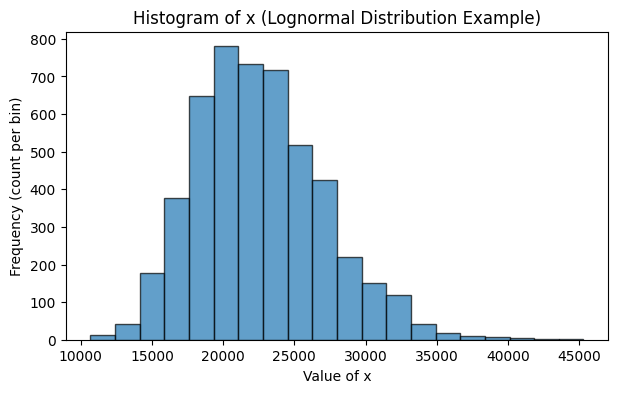

In [40]:
# --- Histogram via NumPy and Matplotlib ---

# Create a histogram of 'x' with 20 bins.
# np.histogram returns:
#   - counts: number of data points in each bin
#   - bins: the edges of each bin (length = number of bins + 1)
counts, bins = np.histogram(x, bins=20)

# Print a quick preview of the first few bins and counts.
# This helps verify bin boundaries and density distribution.
print("\nHistogram bins (first 5):", bins[:5], "...")
print("Counts in first 5 bins:", counts[:5])

# --- Visualization (optional but highly recommended) ---
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
# Plot the histogram using Matplotlib directly for visualization.
# 'edgecolor' outlines the bars clearly; 'alpha' controls transparency.
plt.hist(x, bins=20, edgecolor='black', alpha=0.7)

# Add titles and labels for clarity.
plt.title("Histogram of x (Lognormal Distribution Example)")
plt.xlabel("Value of x")
plt.ylabel("Frequency (count per bin)")

# Display the plot in Jupyter.
plt.show()


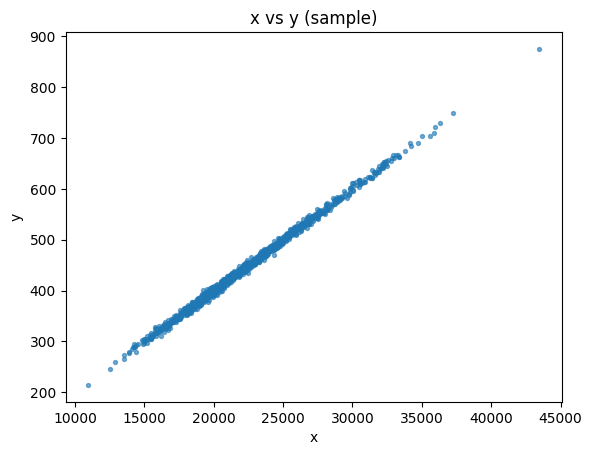

In [41]:
# Optional: quick plot (only if matplotlib installed)
try:
    import matplotlib.pyplot as plt
    plt.figure()
    plt.scatter(x[:1000], y[:1000], s=8, alpha=0.6)
    plt.title("x vs y (sample)")
    plt.xlabel("x"); plt.ylabel("y")
    plt.show()
except Exception as e:
    print("Skipping plot:", e)



**Try it:** Replace the `y` equation to make the relationship nonlinear and check how `corr` responds.



## 5) Linear Algebra Essentials
Many ML models solve linear systems or use matrix factorizations.


## Solving a Linear System \(A x = b\)

We have a system of two linear equations with two unknowns:

\[
\begin{cases}
3x + 2y = 18 \\
x + 2y = 14
\end{cases}
\]

We can represent this system in **matrix form** as:

\[
A =
\begin{bmatrix}
3 & 2 \\
1 & 2
\end{bmatrix},
\quad
x =
\begin{bmatrix}
x \\
y
\end{bmatrix},
\quad
b =
\begin{bmatrix}
18 \\
14
\end{bmatrix}
\]

So the equation becomes:

\[
A x = b
\]


In [42]:
# --- Solving a Linear System Ax = b using NumPy ---

# Step 1: Define the coefficient matrix A.
# Each row of A represents one linear equation.
# Example system:
#   3x + 2y = 18
#   1x + 2y = 14
# So A contains the coefficients of x and y.
A = np.array([[3.0, 2.0],
              [1.0, 2.0]])

# Step 2: Define the constant vector b.
# These are the right-hand side values of the equations.
# b represents the results we want Ax to equal.
b = np.array([18.0, 14.0])

# Step 3: Solve for x using np.linalg.solve.
# This function efficiently computes the vector x that satisfies Ax = b.
# It's equivalent to finding x = A⁻¹b (but avoids explicitly inverting A, which is faster and more stable).
sol = np.linalg.solve(A, b)

# Step 4: Display the solution.
# The resulting array contains [x, y].
print("Solution to Ax=b:", sol)

# Step 5: Verify the solution by multiplying A and x.
# If everything is correct, A @ sol should reproduce the original b vector (within floating-point precision).
print("Check Ax:", A @ sol)


Solution to Ax=b: [2. 6.]
Check Ax: [18. 14.]


## Eigenvalues and Singular Value Decomposition (SVD)

### 1. Eigenvalues and Eigenvectors

Given a square matrix \( A \), an **eigenvector** \( v \) and its **eigenvalue** \( \lambda \) satisfy:

\[
A v = \lambda v
\]

This means that applying \( A \) to \( v \) only **scales** it — the direction doesn’t change, only its length.

- **Eigenvectors** → special directions that remain unchanged by the transformation \(A\).  
- **Eigenvalues** → scaling factors that tell how much \(A\) stretches or compresses along those directions.

For a symmetric matrix \( A = M M^T \), the eigenvalues are always **real and non-negative**.

---

### 2. Singular Value Decomposition (SVD)

For *any* real matrix \( M \) (square or rectangular), we can decompose it as:

\[
M = U \Sigma V^T
\]

Where:
- \( U \) and \( V \) are **orthogonal matrices** (their columns are perpendicular unit vectors).  
- \( \Sigma \) is a diagonal matrix containing **singular values** \( \sigma_1 \ge \sigma_2 \ge \dots \ge 0 \).  
- Each singular value shows **how strongly** the matrix stretches vectors along a particular direction.

Geometrically:
- \( V \) rotates the input space,
- \( \Sigma \) scales along the principal directions,
- \( U \) rotates the result.

---

### 3. Relationship Between Eigenvalues and Singular Values

If we compute \( M M^T \):

\[
M M^T = U \Sigma^2 U^T
\]

This shows that the **eigenvalues of \( M M^T \)** are equal to the **squares of the singular values** of \( M \).

\[
\lambda_i = \sigma_i^2
\]

That’s why we often compute eigenvalues of \( M M^T \) when analyzing singular values.

---

### 4. Why It’s Important in Data Science

| Concept | Role / Application |
|----------|--------------------|
| **Principal Component Analysis (PCA)** | Uses SVD or eigen-decomposition of the covariance matrix to find main directions of variance. |
| **Dimensionality Reduction** | Keep only top singular values → compress data while retaining most information. |
| **Noise Filtering** | Small singular values often correspond to noise → truncating them denoises data. |
| **Recommendation Systems** | SVD helps factorize large user–item matrices (Netflix, Amazon, etc.). |
| **Image Compression** | Keep top singular values of an image matrix to reconstruct an approximation. |
| **Latent Semantic Analysis (NLP)** | Uses SVD on word–document matrices to extract semantic relationships. |

---

### In Short

- **Eigen decomposition** explains a matrix’s natural “axes” of transformation.  
- **SVD** generalizes this idea to *any* data matrix.  
- Both are **foundations of modern machine learning**, from PCA and clustering to deep learning optimization.



In [43]:
# --- Eigen Decomposition and Singular Value Decomposition (SVD) ---

# Step 1: Create a random 5x5 matrix with normally distributed entries.
# Each element is drawn from a standard normal distribution (mean=0, std=1).
# 'randn' means "random normal".
M = np.random.randn(5, 5)

# Step 2: Compute eigenvalues and eigenvectors of a symmetric matrix.
# We use (M @ M.T) to make M symmetric (A = Aᵀ), because only symmetric (or Hermitian)
# matrices have guaranteed real-valued eigenvalues.
# np.linalg.eig returns:
#   - eigvals:  the eigenvalues (λ)
#   - eigvecs:  the corresponding eigenvectors (v)
# such that: (M @ M.T) v = λ v
eigvals, eigvecs = np.linalg.eig(M @ M.T)  # 'symmetric-ish' ensures real eigenvalues

# Step 3: Compute Singular Value Decomposition (SVD).
# Decomposes M into three matrices:
#   M = U * Σ * Vᵀ
# where:
#   - U and V are orthogonal matrices (columns are unit vectors),
#   - Σ (returned as S here) is a diagonal matrix of singular values (always ≥ 0),
#   - full_matrices=False gives a reduced, compact version (faster and cleaner).
U, S, Vt = np.linalg.svd(M, full_matrices=False)

# Step 4: Print results, rounding for readability.
# Eigenvalues show how M@Mᵀ stretches space along principal directions.
# Singular values (S) measure how much M scales vectors along orthogonal axes.
print("\nEigenvalues:", np.round(eigvals, 3))
print("Top-2 singular values:", np.round(S[:2], 3))



Eigenvalues: [10.801  6.84   0.069  1.228  2.489]
Top-2 singular values: [3.286 2.615]



## Machine Learning: Linear Regression (two ways)
We'll fit `y = β₀ + β₁ x + noise` using:
1. **Closed-form** normal equation
2. **Gradient descent**


In [8]:

# Synthetic linear data
n = 500
X1 = np.linspace(0, 10, n)
y = 3.5 + 2.2 * X1 + np.random.randn(n) * 1.0

# Design matrix with bias
X = np.c_[np.ones(n), X1]

# (1) Closed-form: β = (XᵀX)⁻¹ Xᵀ y
beta_cf = np.linalg.inv(X.T @ X) @ X.T @ y
print("Closed-form beta:", np.round(beta_cf, 4))

# (2) Gradient descent
beta = np.zeros(2)
lr = 1e-3
for it in range(20_000):
    grad = (2/n) * (X.T @ (X @ beta - y))
    beta -= lr * grad
print("GD beta:", np.round(beta, 4))


Closed-form beta: [3.4231 2.2147]
GD beta: [3.4229 2.2148]


### Convolution in Data Science and Machine Learning

- **Convolution** is a core mathematical operation in data science and AI.  
- It’s the foundation of **Convolutional Neural Networks (CNNs)** — models used for:
  - Image recognition and classification  
  - Object detection  
  - Medical imaging and computer vision tasks  
- Convolutions help models detect **edges, textures, shapes, and patterns** in data.

---

### Blurring Filters and Their Purpose

- **Blurring filters** (like the box blur used here) are simple but powerful tools that:
  - Reduce **image noise**  
  - **Smooth sharp transitions** between pixels  
  - Prepare data for **further analysis** (e.g., edge detection or segmentation)

---

### Understanding Kernels (Filters)

- A **kernel** (or filter) is a small matrix that transforms an image through local computations.  
- Kernels can:
  - Blur images  
  - Sharpen edges  
  - Detect horizontal or vertical patterns  
- Understanding how kernels work builds intuition for how neural networks process visual information.

---

### Learning by Doing (Manual Convolution)

- Writing a **manual convolution** function (instead of using libraries) helps students:
  - Understand how `scipy.signal.convolve2d()` and CNN layers work internally.  
  - Visualize how a **kernel “slides”** across an image to combine local pixel values.  
  - Appreciate how simple mathematical operations can create complex visual effects.

---

**Takeaway:**  
Mastering convolution and filters bridges the gap between **image processing** and **machine learning**, giving you the mathematical intuition behind how computers "see" and interpret visual data.


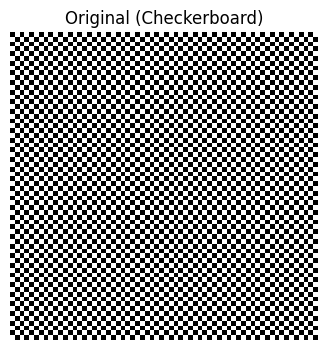

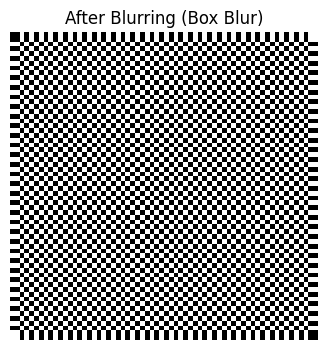

In [14]:
# --- Image Processing Example: 2D Convolution and Blurring (Box Blur) ---

import numpy as np
import matplotlib.pyplot as plt

# 1. Create a simple 2D image: a checkerboard pattern
# This generates a black-and-white grid image that we can use to demonstrate filtering.
def make_checkerboard(n=8, block=10):
    """
    Create a checkerboard image with n×n tiles.
    Each tile is 'block' pixels wide/high.
    The pattern alternates 0 and 1 (black/white).
    """
    img = np.indices((n * block, n * block)).sum(axis=0) % 2
    return img.astype(float)

# Generate the checkerboard image
img = make_checkerboard(8, 8)

# 2. Define a blur kernel (3×3 box blur)
# A kernel (also called a filter or mask) defines how each pixel is averaged with its neighbors.
# This one gives equal weight (1/9) to each pixel in a 3×3 neighborhood.
kernel = np.ones((3, 3)) / 9.0


# 3. Define a simple 2D convolution function (no external libraries)
# Convolution is used to apply filters to images — such as blur, edge detection, etc.
# Here, we compute it manually to understand how it works.
def convolve2d_same(image, kernel):
    """
    Apply a 2D convolution with 'same' output size as input.
    Padding ensures the borders are handled correctly.
    """
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    # Add padding around the image so we can compute border pixels
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='edge')

    # Prepare an empty output image
    out = np.zeros_like(image, dtype=float)

    # Slide the kernel over each pixel
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            region = padded[i:i+kh, j:j+kw]  # extract local region
            out[i, j] = np.sum(region * kernel)  # compute weighted sum
    return out


# 4. Apply the blur filter (convolution)
blurred = convolve2d_same(img, kernel)


# 5. Display the original and blurred images
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap='gray')
plt.title("Original (Checkerboard)")
plt.axis('off')
plt.show()

plt.figure(figsize=(4, 4))
plt.imshow(blurred, cmap='gray')
plt.title("After Blurring (Box Blur)")
plt.axis('off')
plt.show()



## When to Use NumPy vs. pandas / scikit-learn
- **NumPy**: fast n-dimensional arrays, vectorized math, linear algebra, random, foundational for everything else.
- **pandas**: labeled 1D/2D data (Series/DataFrame), I/O, time series, groupby, joins, etc.
- **scikit-learn**: ML models, pipelines, metrics, model selection.

Rule of thumb: use NumPy for **core numeric transforms** and **algorithm building blocks**; reach for pandas & scikit-learn when you need **data wrangling** and **higher-level ML**.



## NumPy Practice Tasks

These exercises will help you apply what you’ve learned — from array basics to data cleaning, stats, and simple ML concepts.  
Try to **write clean, vectorized code** (avoid loops where possible!).

---

### Task 1: Basics & Array Manipulation

1. **Create arrays**
   - Create a 1D NumPy array of integers from 0 to 9.
   - Create a 3×3 identity matrix.
   - Create a 4×4 array of random numbers between 0 and 1.

2. **Array properties**
   - Check the shape, size, and data type (`dtype`) of your arrays.
   - Reshape a 1D array of 12 elements into a 3×4 matrix.

3. **Indexing & slicing**
   - Extract the second row and last column of a 3×3 matrix.
   - Reverse an array using slicing (`[::-1]`).

4. **Broadcasting**
   - Create an array `a = [1, 2, 3]` and add `[10]` to each element using broadcasting.


### Task 2: Data Cleaning & Transformation

**Handle missing values**
   ```python
   arr = np.array([10, np.nan, 20, np.nan, 30])
   ```

### Task 3: Detect and Clip Outliers

**Instructions:**
- Create an array of **20 random integers** between **10 and 100**.  
- Find the **95th percentile** using `np.percentile()`.  
- Use `np.clip()` to **cap all values above that percentile** to the cutoff value.  
- Print both the **original** and **clipped** arrays to compare.


### Task 4: Normalize Data

**Instructions:**
- Given an array of exam scores, **normalize** it so that it has:
  - **Mean = 0**
  - **Standard Deviation = 1**
  
Formula for normalization:
\[
z = \frac{x - \mu}{\sigma}
\]

*Hint:* Use `np.mean()` and `np.std()` to calculate \(\mu\) and \(\sigma\).


### Task 5: Conditional Logic

**Instructions:**
- Create an array with both **positive** and **negative** numbers.  
- Use `np.where()` to **replace all negative numbers with 0** (keep others unchanged).  
- Print the final array.

*Hint:*  
`np.where(condition, value_if_true, value_if_false)`  
is the vectorized equivalent of an `if-else` statement for arrays.

